# WeatherPy
----



## Observations

For Latitude vs. Temperature Plot, it shows that temperatures are at their highest nearest the equator.  Temperatures decrease the closer they get to the poles.
For the Northern Hemisphere - Max Temp vs. Latitude Linear Regression there is a negative correlation.  As the latitude increases (moves farther away from the equator), the temperature decreases.
For the Southern Hemisphere - Max Temp vs. Latitude Linear Regression, there is a positive correlation.  As latitude increases (moves closer to the equator), the temperature increases.
For the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression. the correlation is very low, so low that the correlation is pretty negligible.
For the Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression. the correlation is very low, so low that the correlation is pretty negligible.




#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from api_keys import weather_api_key
from pprint import pprint
import time
import os

## Generate Cities List

In [110]:
curr_date = pd.to_datetime('today').date().strftime('%m/%d/%Y')

city_names = []
city_country_codes = []
city_count = 0


for i in range(2000):
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lon)
    
    if city.city_name not in city_names:
        city_names.append(city.city_name)
        city_country_codes.append(city.country_code)
        
city_count=len(city_names)
print(city_count)

777


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

city_temps = []
city_lats = []
city_longs = []
city_hums = []
city_clouds = []
city_winds = []
cities_gathered = []
countries_gathered = []
city_dates = []
dash = '--------------------------'


n = 50
num = 10
city_name_list = [city_names[i * n:(i + 1) * n] for i in range((len(city_names) + n - 1) // n )]
city_country_codes_list = [city_country_codes[i * n:(i + 1) * n] for i in range((len(city_country_codes) + n - 1) // n )]

print(f'Beginning Retrieving Data')
print(dash)


for i in range(len(city_name_list)):
        time.sleep(num)
        for j in range(len(city_name_list[i])):
            one_city = city_name_list[i][j]
            one_country_code = city_country_codes_list[i][j]
            print(f'Processing record {j+1} of Group{i+1} | {one_city}, {one_country_code}')
            url = f'http://api.openweathermap.org/data/2.5/weather?q={one_city},{one_country_code}&units=imperial&appid={weather_api_key}'
            response = requests.get(url)
            if response.ok:
                response_json = response.json()
                cities_gathered.append(response_json['name'])
                city_lats.append(response_json['coord']['lat'])
                city_longs.append(response_json['coord']['lon'])
                city_temps.append(response_json['main']['temp_max'])
                city_hums.append(response_json['main']['humidity'])
                city_clouds.append(response_json['clouds']['all'])
                city_winds.append(response_json['wind']['speed'])     
                countries_gathered.append(response_json['sys']['country'])
                city_dates.append(response_json['dt']) 
            else:
                print('City not found. Skipping...')
      
        
print(dash)
print('Data Retrieval Complete')
print(dash)



Beginning Retrieving Data
--------------------------
Processing record 1 of Group1 | nizhneyansk, ru
City not found. Skipping...
Processing record 2 of Group1 | hermanus, za
Processing record 3 of Group1 | hambantota, lk
Processing record 4 of Group1 | khatanga, ru
Processing record 5 of Group1 | sobolevo, ru
Processing record 6 of Group1 | upernavik, gl
Processing record 7 of Group1 | pisco, pe
Processing record 8 of Group1 | rikitea, pf
Processing record 9 of Group1 | aklavik, ca
Processing record 10 of Group1 | manokwari, id
Processing record 11 of Group1 | atuona, pf
Processing record 12 of Group1 | ponta delgada, pt
Processing record 13 of Group1 | rawson, ar
Processing record 14 of Group1 | geraldton, au
Processing record 15 of Group1 | illoqqortoormiut, gl
City not found. Skipping...
Processing record 16 of Group1 | ushuaia, ar
Processing record 17 of Group1 | tsumeb, na
Processing record 18 of Group1 | vila velha, br
Processing record 19 of Group1 | los llanos de aridane, es
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [112]:
city_weather_dict = {
    'City': cities_gathered,  
    'Lat': city_lats,
    'Lng': city_longs,
    'Max Temp': city_temps,
    'Humidity': city_hums,
    'Cloudiness': city_clouds,
    'Wind Speed': city_winds,
    'Country': countries_gathered,
    'Date': city_dates
    }
city_weather_data = pd.DataFrame(city_weather_dict)
city_weather_data
out_file = os.path.join('Output', 'city_weather_data.csv')
city_weather_data.to_csv(out_file, index=False)

In [113]:
city_weather_data_describe = city_weather_data.describe()
city_weather_data_describe

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,7.020000e+02
mean,20.498219,20.878903,64.805128,70.552707,49.638177,8.737023,1.600386e+09
std,33.409646,88.148047,15.119181,20.928639,37.870228,6.139519,1.173473e+02
min,-54.800000,-175.200000,19.650000,6.000000,0.000000,0.130000,1.600385e+09
25%,-8.115000,-55.005000,51.747500,58.250000,9.000000,4.000000,1.600386e+09
50%,25.140000,24.695000,66.460000,76.000000,49.500000,7.145000,1.600386e+09
75%,49.880000,101.672500,77.000000,87.000000,86.000000,11.605000,1.600386e+09
max,78.220000,179.320000,109.400000,100.000000,100.000000,37.020000,1.600386e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [114]:
#  Get the indices of cities that have humidity over 100%.
cd_greater_humidity = city_weather_data.loc[city_weather_data['Humidity'] > 100]

print(f'City weather data length is {len(city_weather_data)}')
print(f'Greater humidity length is {len(cd_greater_humidity)}')
cd_greater_humidity

City weather data length is 702
Greater humidity length is 0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [118]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_data.drop(cd_greater_humidity.index, inplace=False)

print(f'Total records in clean_city_data dataframe is {len(clean_city_data)}')
clean_city_data

Total records in clean_city_data dataframe is 702


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,46.00,94,36,3.76,ZA,1600385655
1,Hambantota,6.12,81.12,79.95,79,86,17.98,LK,1600385656
2,Khatanga,71.97,102.50,47.68,77,12,9.42,RU,1600385656
3,Sobolevo,54.43,31.90,46.38,85,89,17.49,RU,1600385656
4,Upernavik,72.79,-56.15,31.95,93,76,5.82,GL,1600385656
...,...,...,...,...,...,...,...,...,...
697,Walvis Bay,-22.96,14.51,54.00,100,0,9.17,NA,1600385995
698,Vytegra,61.01,36.45,45.01,92,100,15.41,RU,1600385996
699,Omsukchan,62.53,155.80,37.90,75,69,5.73,RU,1600385996
700,Jinhua,29.11,119.65,66.07,92,100,0.72,CN,1600385997


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

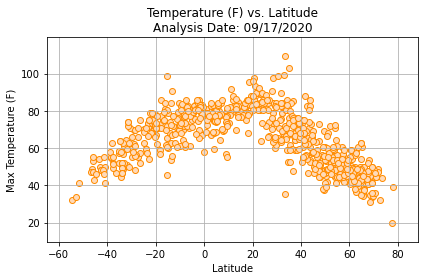

In [119]:
lat = clean_city_data['Lat']
max_temp = clean_city_data['Max Temp']


plt.scatter(x=lat, y=max_temp, marker="o", facecolors="peachpuff", edgecolors="darkorange")
plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(max_temp)-10, max(max_temp)+10)
plt.grid(b=None, which='major', axis='both')

plt.tight_layout()

plt.savefig(os.path.join("Output","maxtemps_lats.png"))

## Latitude vs. Humidity Plot

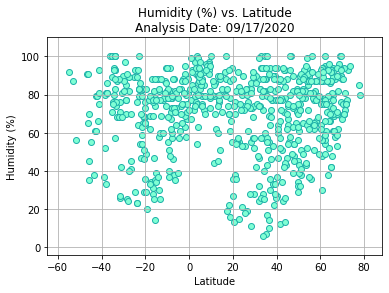

In [120]:
humidity = clean_city_data['Humidity']

plt.scatter(x=lat, y=humidity, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")
plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(humidity)-10, max(humidity)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats.png"))

## Latitude vs. Cloudiness Plot

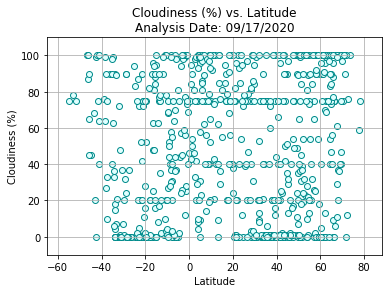

In [121]:
cloudiness = clean_city_data['Cloudiness']

plt.scatter(x=lat, y=cloudiness, marker="o", facecolors="lightcyan", edgecolors="darkcyan")
plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(cloudiness)-10, max(cloudiness)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats.png"))

## Latitude vs. Wind Speed Plot

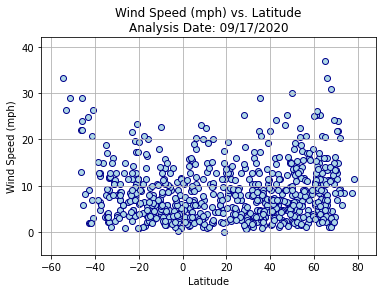

In [122]:
wind_speed = clean_city_data['Wind Speed']

plt.scatter(x=lat, y=wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")
plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(wind_speed)-5, max(wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats.png"))

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is -0.787
The p-value is 1.6175466295676907e-102


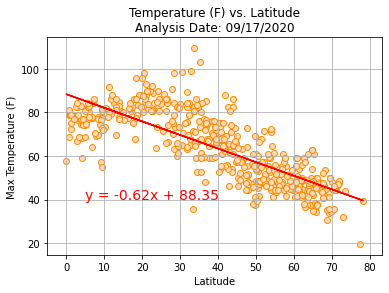

In [133]:
northern = clean_city_data.loc[clean_city_data['Lat'] >=0]
southern = clean_city_data.loc[clean_city_data['Lat'] <0]

northern_lats = northern['Lat']
northern_max_temps = northern['Max Temp']

correlation = sts.pearsonr(northern_lats, northern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_max_temps)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=northern_lats, y=northern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 40), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_max_temps)-5, max(northern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_latitude_lr_north.png"))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is 0.773
The p-value is 2.1023409259653508e-45


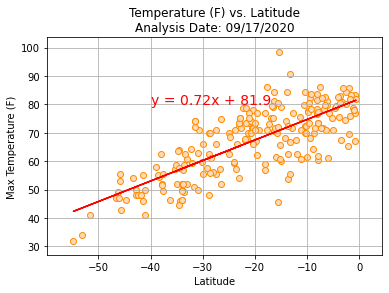

In [134]:
southern_lats = southern['Lat']
southern_max_temps = southern['Max Temp']

correlation = sts.pearsonr(southern_lats, southern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_max_temps)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-40, 80), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_max_temps)-5, max(southern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_lats_lr_south.png"))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.028
The p-value is 0.5364567827283272


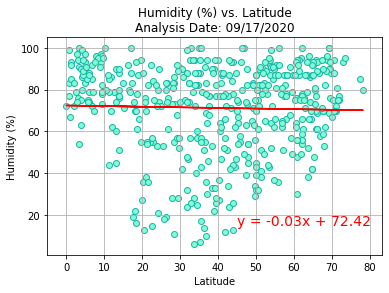

In [135]:
northern_hums = northern['Humidity']

correlation = sts.pearsonr(northern_lats, northern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_hums)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (45, 15), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_hums)-5, max(northern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_north.png"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.033
The p-value is 0.628569090164785


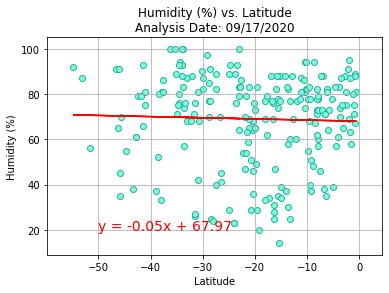

In [136]:
southern_hums = southern['Humidity']

correlation = sts.pearsonr(southern_lats, southern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_hums)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=southern_lats, y=southern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_hums)-5, max(southern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_south.png"))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.051
The p-value is 0.2650154669338021


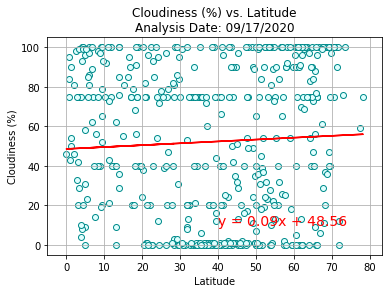

In [137]:
northern_clouds = northern['Cloudiness']

correlation = sts.pearsonr(northern_lats, northern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_clouds)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (40, 10), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_clouds)-5, max(northern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_north.png"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.022
The p-value is 0.7498977394987651


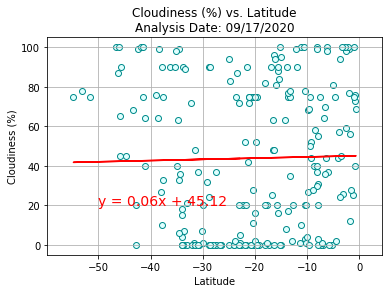

In [138]:
southern_clouds = southern['Cloudiness']

correlation = sts.pearsonr(southern_lats, southern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_clouds)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_clouds)-5, max(southern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_south.png"))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.171
The p-value is 0.00016152113200410483


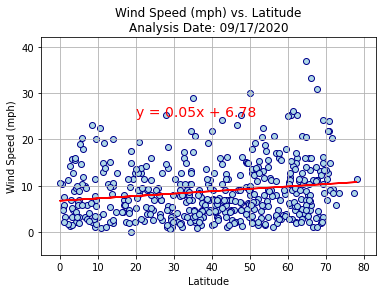

In [139]:
northern_wind_speed = northern['Wind Speed']

correlation = sts.pearsonr(northern_lats, northern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_wind_speed)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (20,25), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_wind_speed)-5, max(northern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_north.png"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.358
The p-value is 4.24053731532285e-08


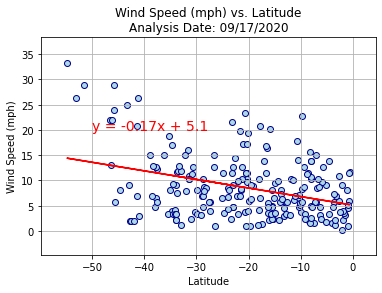

In [140]:
southern_wind_speed = southern['Wind Speed']


correlation = sts.pearsonr(southern_lats, southern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_wind_speed)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50,20), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_wind_speed)-5, max(southern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_south.png"))